# PRE READING

### In An Introduction to Statistical Learning External link 2nd Edition, read the following sections:

### 2.2.2 Bias Variance Tradeoff (pages 33-36)
### Optional: 6.2.1-6.2.2: Ridge and Lasso Regression - Estimating the Regression Coefficients (pages 215-227)
### Optional: Regularization in Machine Learning External link

# Exercise: Variation of coefficients


In [1]:
# Import libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Run this cell for more readable visuals 

large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-v0_8-white')
plt.rcParams.update(params)

%matplotlib inline

In [3]:
# Read the file "bacteria_train.csv" as a dataframe

df = pd.read_csv("bacteria_train.csv")

In [4]:
# Take a quick look of your dataset

df.head()

,Perc_population,Spreading_factor
0,1.535,0.190708
1,5.555,0.326928
2,-0.277,-0.459699
3,1.724,-0.193013
4,-0.550,-0.835745


In [5]:
df.shape

(423, 2)

In [6]:
# Store the predictor ('Spreading_factor') and the response ('Perc_population') values as the variables 'x' and 'y'

x, y  = df[['Spreading_factor']], df['Perc_population']

In [7]:
# Select the number of polynomial features as per the maximum degree
# set include_bias to false to avoid adding an extra intercept to our models

maxdeg = 7
x_poly = PolynomialFeatures(degree=maxdeg, include_bias=False).fit_transform(x)
x_poly = normalize(x_poly, axis=0)

In [8]:
x_poly.shape

(423, 7)

In [9]:
# Select a list of alpha values ranging from 10 to 120 with 1000 points between them

alpha_list = np.linspace(10,120,1000)
len(alpha_list)

1000

In [10]:
### edTest(test_ridge_fit) ###
# Make an empty list called coeff_list and for each alpha value, compute the coefficients and add it to coeff_list
coeff_list = []


# Now, you will implement the ridge regularisation for each alpha value

for a in alpha_list:

    ridge_reg = Ridge(alpha=a)

    # Fit on the entire data because we just want to see the trend of the coefficients

    ridge_reg.fit(x_poly, y)
    
    # Append the coeff_list with the coefficients of the model
    
    coeff_list.append(ridge_reg.coef_)

In [11]:
coeff_list

[array([3.00719777, 0.59357195, 2.39711665, 0.42842101, 1.86228407,
        0.24831294, 1.49568947]),
 array([2.98042578, 0.58697469, 2.37736564, 0.42335616, 1.8480395 ,
        0.24504193, 1.48503823]),
 array([2.95413427, 0.58051736, 2.35793959, 0.41840132, 1.83400742,
        0.24184468, 1.47452903]),
 array([2.92831023, 0.57419566, 2.33883049, 0.4135531 , 1.82018325,
        0.2387189 , 1.46415935]),
 array([2.90294108, 0.56800543, 2.32003059, 0.40880822, 1.80656251,
        0.23566241, 1.45392672]),
 array([2.87801472, 0.56194273, 2.30153238, 0.40416357, 1.79314086,
        0.23267307, 1.44382869]),
 array([2.85351947, 0.55600372, 2.28332863, 0.39961613, 1.77991406,
        0.22974887, 1.43386287]),
 array([2.82944408, 0.55018474, 2.2654123 , 0.395163  , 1.76687801,
        0.22688785, 1.42402692]),
 array([2.80577767, 0.54448228, 2.2477766 , 0.3908014 , 1.7540287 ,
        0.22408813, 1.41431853]),
 array([2.78250975, 0.53889293, 2.23041494, 0.38652866, 1.74136223,
        0.2213

In [12]:
# We take the transpose of the list to get the variation in the coefficient values per degree

ridge_trend = np.array(coeff_list).T
ridge_trend

array([[3.00719777, 2.98042578, 2.95413427, ..., 0.30616101, 0.30588584,
        0.30561117],
       [0.59357195, 0.58697469, 0.58051736, ..., 0.04627625, 0.04623319,
        0.0461902 ],
       [2.39711665, 2.37736564, 2.35793959, ..., 0.25947804, 0.25924628,
        0.25901494],
       ...,
       [1.86228407, 1.8480395 , 1.83400742, ..., 0.21235176, 0.21216305,
        0.21197468],
       [0.24831294, 0.24504193, 0.24184468, ..., 0.01275027, 0.01273741,
        0.01272458],
       [1.49568947, 1.48503823, 1.47452903, ..., 0.17830389, 0.1781461 ,
        0.1779886 ]])

In [13]:
ridge_trend.shape

(7, 1000)

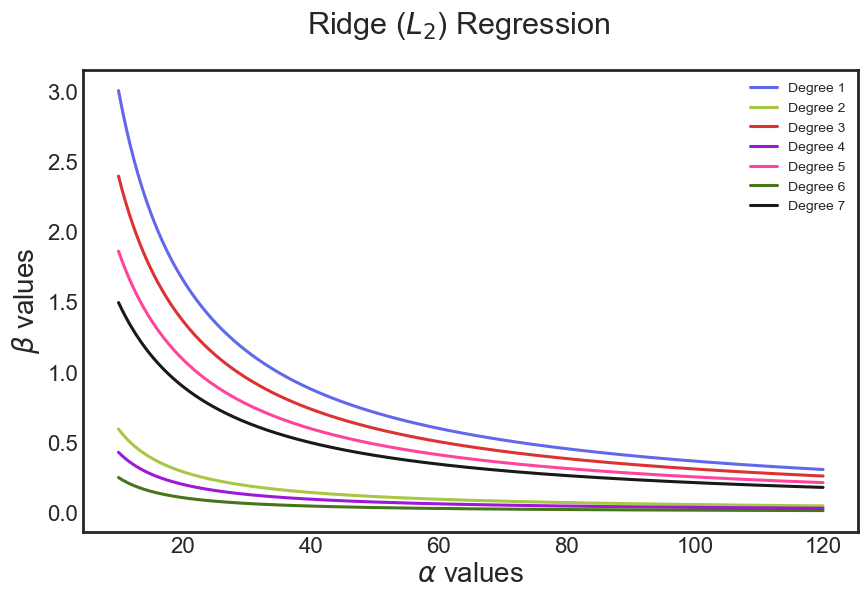

In [14]:
# Use the code below to plot the variation of the coefficients as per the alpha value

# Just adding some nice colors. make sure to comment this cell out if you plan to use degree more than 7
colors = ['#5059E8','#9FC131FF','#D91C1C','#9400D3','#FF2F92','#336600','black']

fig, ax = plt.subplots(figsize = (10,6))
for i in range(maxdeg):
    ax.plot(alpha_list, np.abs(ridge_trend[i]), color=colors[i],
            alpha = 0.9, label = f'Degree {i+1}', lw=2.2)
    ax.legend(loc='best',fontsize=10)
    ax.set_xlabel(r'$\alpha$ values', fontsize=20)
    ax.set_ylabel(r'$\beta$ values', fontsize=20)

fig.suptitle(r'Ridge ($L_2$) Regression');

In [15]:
# Select a list of alpha values ranging from 1e-4 to 1e-1 with 1000 points between them

alpha_list = np.linspace(0.0001,0.01,1000)
len(alpha_list)

1000

In [16]:
### edTest(test_lasso_fit) ###
# Make an empty list called coeff_list and for each alpha value, compute the coefficients and add it to coeff_list
coeff_list = []


# Now, you will implement the ridge regularisation for each alpha value

for a in alpha_list:

    lasso_reg = Lasso(alpha=a,max_iter=250000)

    # Fit on the entire data because we just want to see the trend of the coefficients
    
    lasso_reg.fit(x_poly, y)
    
    # Again append the coeff_list with the coefficients of the model
    
    coeff_list.append(lasso_reg.coef_)


In [17]:
coeff_list

[array([ 42.12877276,  33.40813263,  -1.69069546,   2.30465486,
          0.        , -15.25423842,  -2.96157696]),
 array([ 42.09188244,  34.33729092,  -1.66861869,   0.25236233,
         -0.        , -13.98888063,  -2.94260063]),
 array([ 42.01008241,  34.32613825,  -1.54021443,   0.12478422,
         -0.        , -13.85876914,  -2.99548254]),
 array([ 41.91990335,  34.31446722,  -1.39649327,   0.        ,
         -0.        , -13.73117821,  -3.05671873]),
 array([ 41.85295423,  34.27108527,  -1.2950058 ,   0.        ,
         -0.        , -13.69612183,  -3.0963942 ]),
 array([ 41.77009148,  34.2088586 ,  -1.16330428,   0.        ,
         -0.        , -13.64886915,  -3.15228575]),
 array([ 41.69147499,  34.14929089,  -1.03957992,   0.        ,
         -0.        , -13.60322879,  -3.20384131]),
 array([ 41.60617163,  34.07997778,  -0.90313134,   0.        ,
         -0.        , -13.55119367,  -3.26216915]),
 array([ 41.51883133,  34.01526791,  -0.76341128,   0.        ,
        

In [18]:
# We take the transpose of the list to get the variation in the coefficient values per degree

lasso_trend = np.array(coeff_list).T
lasso_trend

array([[ 42.12877276,  42.09188244,  42.01008241, ...,  34.29153052,
         34.28632236,  34.28111419],
       [ 33.40813263,  34.33729092,  34.32613825, ...,   9.94473878,
          9.93490826,   9.92507775],
       [ -1.69069546,  -1.66861869,  -1.54021443, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -0.        ,  -0.        , ...,   0.        ,
          0.        ,   0.        ],
       [-15.25423842, -13.98888063, -13.85876914, ...,   0.        ,
          0.        ,   0.        ],
       [ -2.96157696,  -2.94260063,  -2.99548254, ...,   0.        ,
          0.        ,   0.        ]])

In [19]:
lasso_trend.shape

(7, 1000)

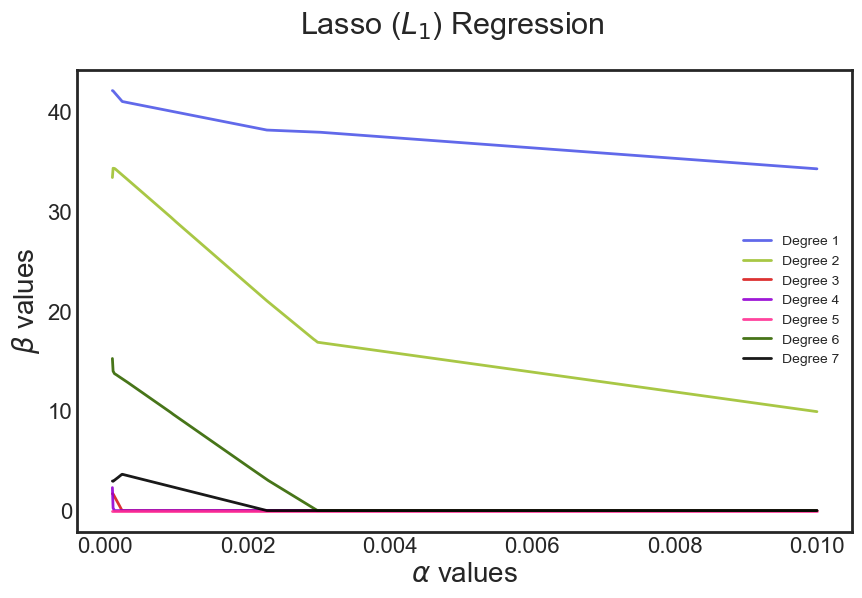

In [20]:
# Use helper code below to plot the variation of the coefficients as per the alpha value

colors = ['#5059E8','#9FC131FF','#D91C1C','#9400D3','#FF2F92','#336600','black']

fig, ax = plt.subplots(figsize = (10,6))
for i in range(maxdeg):
    ax.plot(alpha_list, np.abs(lasso_trend[i]), color=colors[i], 
            alpha = 0.9, label = f'Degree {i+1}', lw=2)
    ax.legend(loc='best',fontsize=10)
    ax.set_xlabel(r'$\alpha$ values', fontsize=20)
    ax.set_ylabel(r'$\beta$ values', fontsize=20)

fig.suptitle(r'Lasso ($L_1$) Regression');

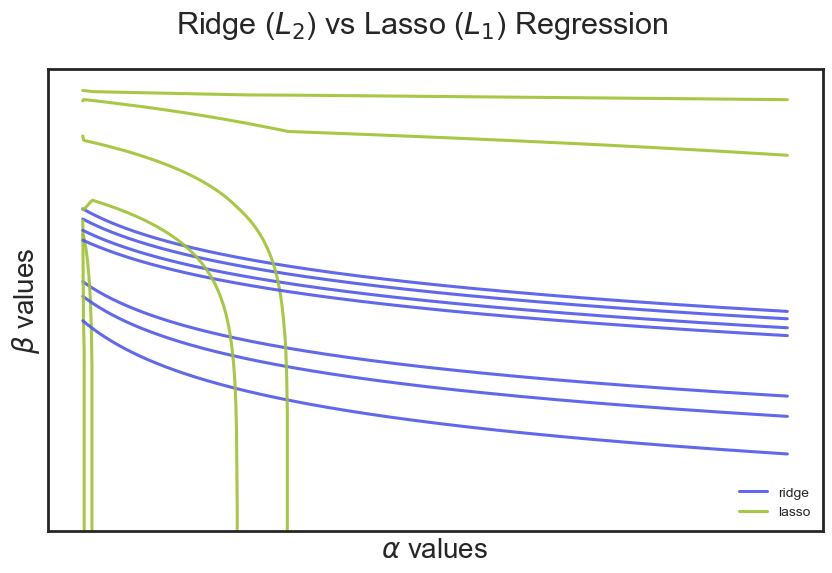

In [21]:
# Plot the variation of log-betas on vs the alpha value
# This plot makes it even more clear that ridge does not shrink coefs to 0.

# colors for the different methods.colors = ['dodgerblue', 'orangered']
fig, ax = plt.subplots(figsize = (10,6))
for i in range(maxdeg):
    if i == 0:
        labels = ["ridge", "lasso"]
    else:
        labels = [None, None]
    ax.semilogy(alpha_list, np.abs(ridge_trend[i]), color=colors[0],
                alpha = 0.9, lw=2.2, label = labels[0])
    ax.semilogy(alpha_list, np.abs(lasso_trend[i]), color=colors[1],
                alpha = 0.9, lw=2.2, label = labels[1])
    ax.legend(loc='best',fontsize=10)
    ax.set_xlabel(r'$\alpha$ values', fontsize=20)
    ax.set_ylabel(r'$\beta$ values', fontsize=20)
    ax.tick_params(axis='both',which='both',bottom=False,top=False,
                labelbottom=False,labelleft=False)

fig.suptitle(r'Ridge ($L_2$) vs Lasso ($L_1$) Regression');

# Exercise: Bias Variance Tradeoff

In [23]:
#Import necessary libraries
%matplotlib inline
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [24]:
# Helper function to define plot characteristics
def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$", fontsize=18)
    axes[0].set_xlabel("$x$", fontsize=18)
    axes[1].set_xlabel("$x$", fontsize=18)
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    axes[0].set_xlim([0,1])
    axes[1].set_xlim([0,1])
    plt.tight_layout();
    return axes
    

In [25]:
# Reading the file into a dataframe
df = pd.read_csv("noisypopulation.csv")


In [26]:
df.head()

,f,x,y
0,0.047790,0.00,0.011307
1,0.051199,0.01,0.010000
2,0.054799,0.02,0.007237
3,0.058596,0.03,0.000056
4,0.062597,0.04,0.010000


In [27]:
df.shape

(200, 3)

In [28]:
# Set column x is the predictor and column y is the response variable.
# Column f is the true function of the given data
# Select the values of the columns (should be numpy arrays)

x = df.x.values
f = df.f.values
y = df.y.values


In [29]:
### edTest(test_poly) ###
# Function to compute the Polynomial Features for the data x 
# for the given degree d
def polyshape(d, x):
    return PolynomialFeatures(degree=d).fit_transform(x.reshape(-1,1))
    

In [30]:
### edTest(test_linear) ###
# Function to fit a Linear Regression model 
def make_predict_with_model(x, y, x_pred):
    
    # Create a Linear Regression model with fit_intercept as False
    lreg = LinearRegression(fit_intercept=False)
    
    # Fit the model to the data x and y got parameters to the function
    lreg.fit(x, y)
    
    # Predict on the x_pred data got as a parameter to this function
    y_pred = lreg.predict(x_pred)

    # Return the linear model and the prediction on the test data
    return lreg, y_pred


In [31]:
# Function to perform sampling and fit the data, with the following parameters

# degree is the maximum degree of the model
# num_sample is the number of samples
# size is the number of random points selected from the data for each sample
# x is the predictor variable
# y is the response variable

def gen(degree, num_sample, size, x, y):
    
    # Create 2 lists to store the prediction and model
    predicted_values, linear_models =[], []
    
    # Loop over the number of samples
    for i in range(num_sample):
        
        # Helper code to call the make_predict_with_model function to fit on the data
        indexes=np.sort(np.random.choice(x.shape[0], size=size, replace=False))
        
        # lreg and y_pred hold the model and predicted values for the current sample
        lreg, y_pred = make_predict_with_model(polyshape(degree, x[indexes]), y[indexes], polyshape(degree, x))
        
        # Append the model and predicted values to the appropriate lists
        predicted_values.append(y_pred)
        linear_models.append(lreg)
    
    # Return the 2 lists, one for predicted values and one for the model
    return predicted_values, linear_models
    

In [37]:
### edTest(test_gen) ###
# Call the function gen() twice with x and y as the 
# predictor and response variable respectively

# Set the number of samples to 200 and the number of points as 30
# Store the return values in appropriate variables

# Get results for degree 1
predicted_1, model_1 = gen(1,200,30,x,y);

# Get results for degree 100
predicted_100, model_100 = gen(100,200,30,x,y);


<Figure size 1200x800 with 0 Axes>

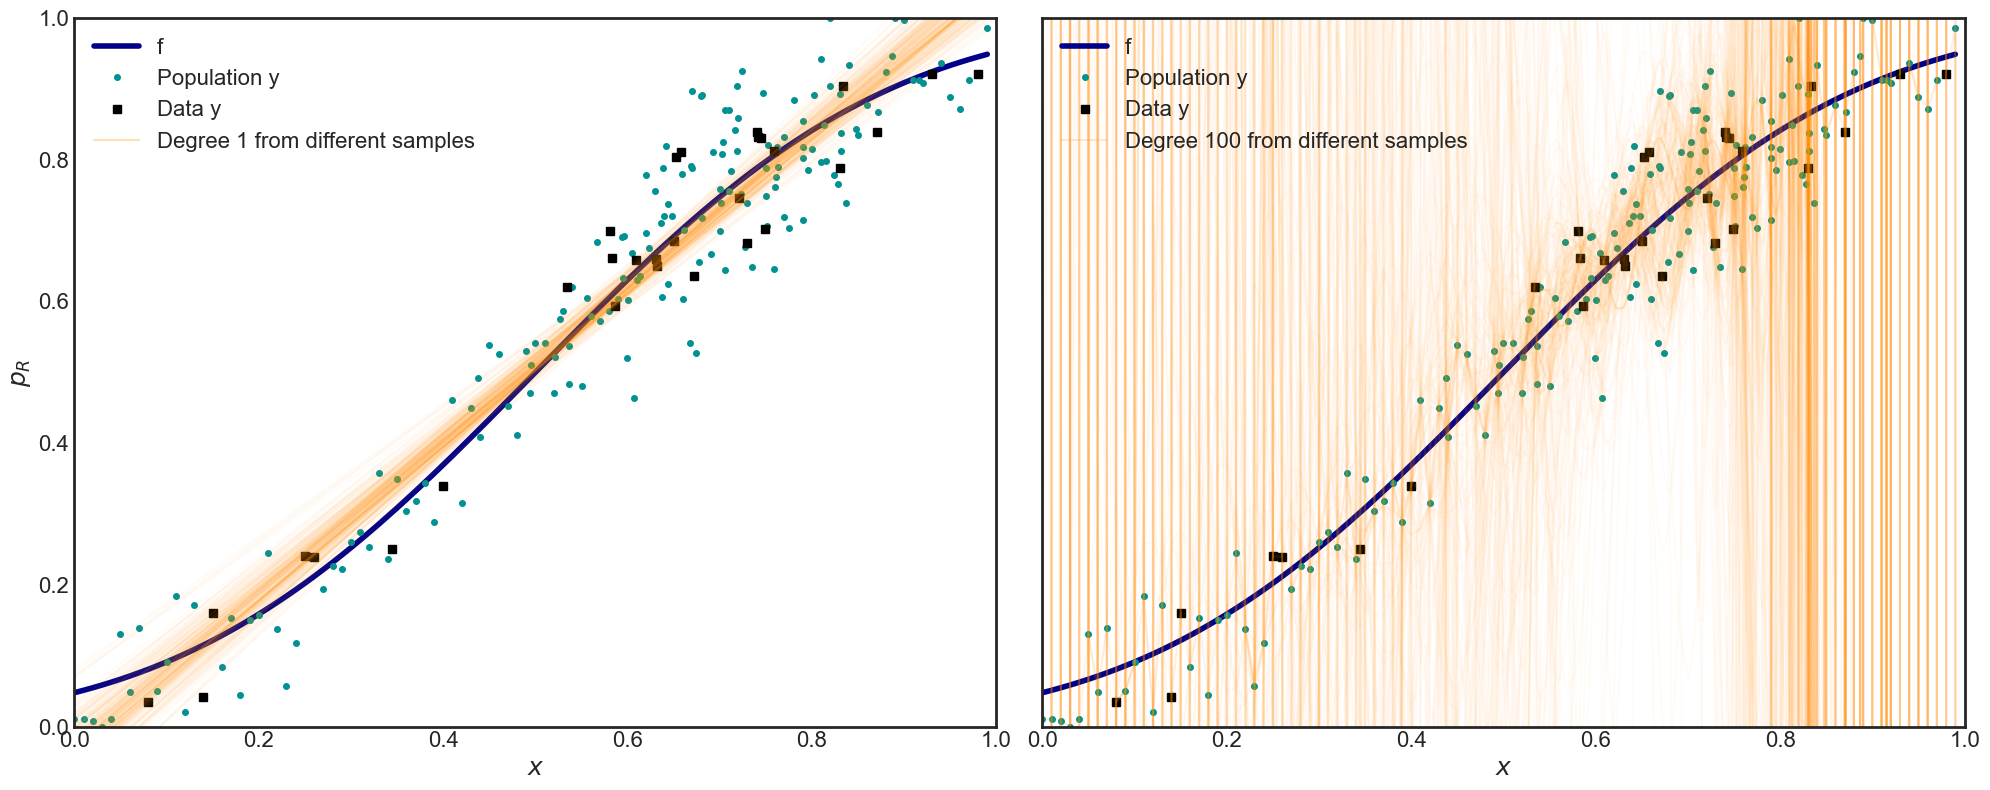

In [38]:
# Helper code to plot the data
indexes = np.sort(np.random.choice(x.shape[0], size=30, replace=False))

plt.figure(figsize = (12,8))
axes=make_plot()

# Plot for Degree 1
axes[0].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[0].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[0].plot(x[indexes], y[indexes], 's', color='black', label="Data y")

for i,p in enumerate(predicted_1[:-1]):
    axes[0].plot(x,p,alpha=0.03,color='#FF9300')
axes[0].plot(x, predicted_1[-1], alpha=0.3,color='#FF9300',label="Degree 1 from different samples")


# Plot for Degree 100
axes[1].plot(x,f,label="f", color='darkblue',linewidth=4)
axes[1].plot(x, y, '.', label="Population y", color='#009193',markersize=8)
axes[1].plot(x[indexes], y[indexes], 's', color='black', label="Data y")


for i,p in enumerate(predicted_100[:-1]):
    axes[1].plot(x,p,alpha=0.03,color='#FF9300')
axes[1].plot(x,predicted_100[-1],alpha=0.2,color='#FF9300',label="Degree 100 from different samples")

axes[0].legend(loc='best')
axes[1].legend(loc='best')

plt.show();


# Exercise: Regularization with Cross-validation

In [161]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
%matplotlib inline

In [162]:
# Initialising required parameters

# The list of random states
ran_state = [0, 10, 21, 42, 66, 109, 310, 1969]

# The list of alpha for regularization
alphas = [1e-7,1e-5, 1e-3, 0.01, 0.1, 1]

# The degree of the polynomial to use in this exercise
degree = 30
    

In [163]:
# Read the file 'polynomial50.csv' as a dataframe
df = pd.read_csv('polynomial50.csv')

# Assign the values of the 'x' column as the predictor
x = df[['x']].values

# Assign the values of the 'y' column as the response
y = df['y'].values

# Also assign the true value of the function (column 'f') to the variable f 
f = df['f'].values

In [164]:
df.head()

,x,f,y
0,0.000000,1.000000,0.923951
1,0.020408,1.039176,1.028283
2,0.040816,1.075173,1.069739
3,0.061224,1.108144,1.077327
4,0.081633,1.138242,1.105688


In [165]:
df.shape

(50, 3)

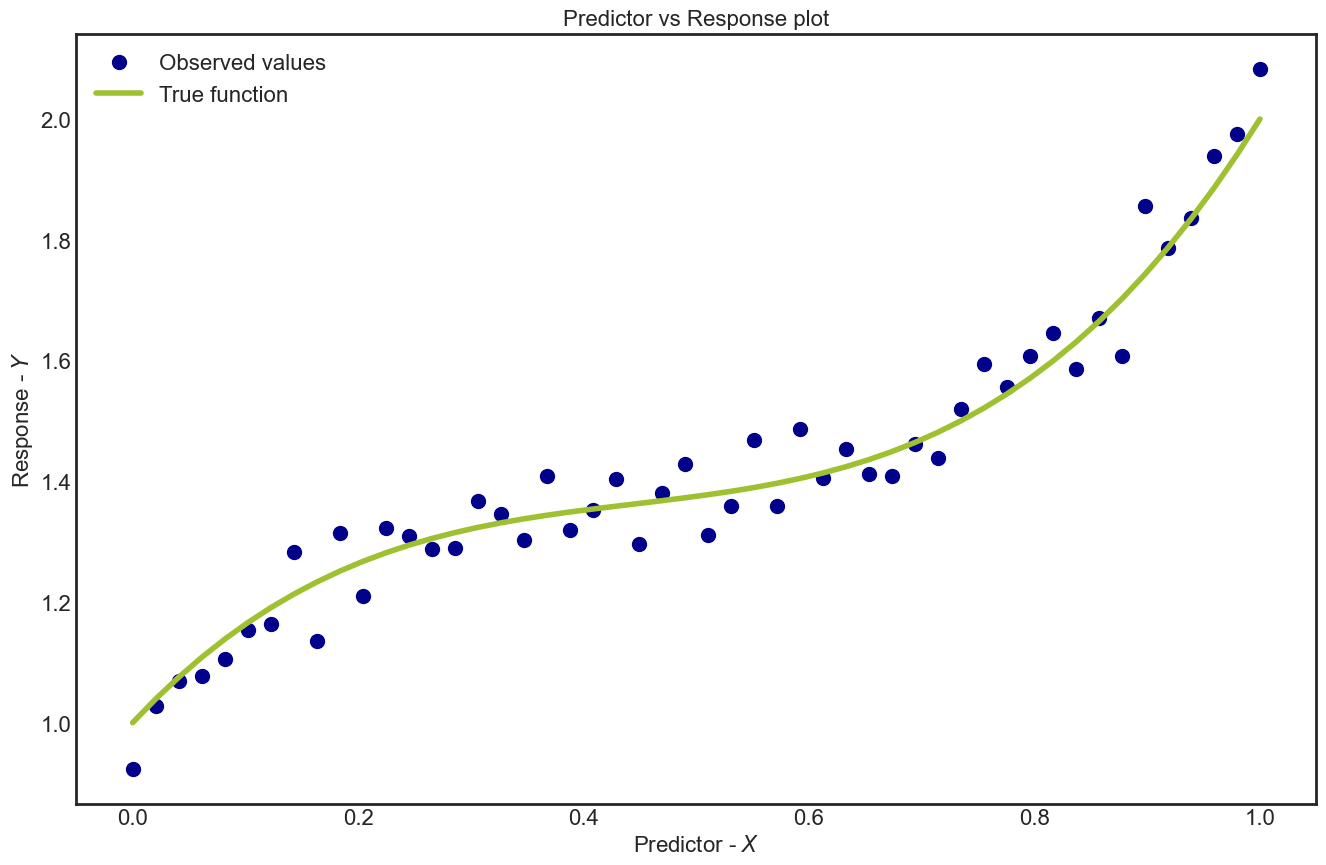

In [166]:
# Use the helper code below to visualise the distribution of the x, y values & also the value of the true function f

fig, ax = plt.subplots()

# Plot x vs y values
ax.plot(x,y, 'o', label = 'Observed values',markersize=10 ,color = 'Darkblue')

# Plot x vs true function value
ax.plot(x,f, 'k-', label = 'True function',linewidth=4,color ='#9FC131FF')

ax.legend(loc = 'best');
ax.set_xlabel('Predictor - $X$',fontsize=16)
ax.set_ylabel('Response - $Y$',fontsize=16)
ax.set_title('Predictor vs Response plot',fontsize=16);

In [178]:
# Function to perform regularization with simple validation
def reg_with_validation(rs):
    
    # Split the data into train and validation sets with train size as 80% and random_state as
    x_train, x_val, y_train, y_val = train_test_split(x,y, train_size = 0.8, random_state=rs)

    # Create two lists for training and validation error
    training_error, validation_error = [],[]

    # Compute the polynomial features train and validation sets
    # Use the degree defined at the top of this notebook
    x_poly_train = PolynomialFeatures(degree=degree).fit_transform(x_train)
    x_poly_val= PolynomialFeatures(degree=degree).fit_transform(x_val)

    # Run a loop for all alpha values
    for alpha in alphas:

        # Initialise a Ridge regression model by specifying the alpha and with fit_intercept=False
        ridge_reg = Ridge(alpha=alpha,fit_intercept=False)
        
        # Fit on the modified training data
        ridge_reg.fit(x_poly_train,y_train)

        # Predict on the training set 
        y_train_pred = ridge_reg.predict(x_poly_train)
        
        # Predict on the validation set 
        y_val_pred = ridge_reg.predict(x_poly_val)
        
        # Compute the training and validation mean squared errors
        mse_train = mean_squared_error(y_train,y_train_pred)
        mse_val = mean_squared_error(y_val,y_val_pred)

        # Append the MSEs to their respective lists 
        training_error.append(mse_train)
        validation_error.append(mse_val)
    
    # Return the train and validation MSE
    return training_error, validation_error


In [186]:
reg_with_validation(rs)

([0.0019540254892075363,
  0.00202228608171323,
  0.0021428110071277074,
  0.0026616792998437346,
  0.00378190751779616,
  0.0057612159932983655],
 [0.0026205236787006925,
  0.0024471661898112025,
  0.002324123795675081,
  0.002237973822906491,
  0.0025639599440531098,
  0.00343844974958607])

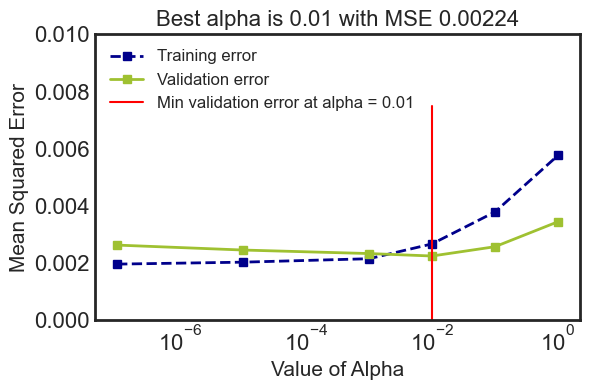

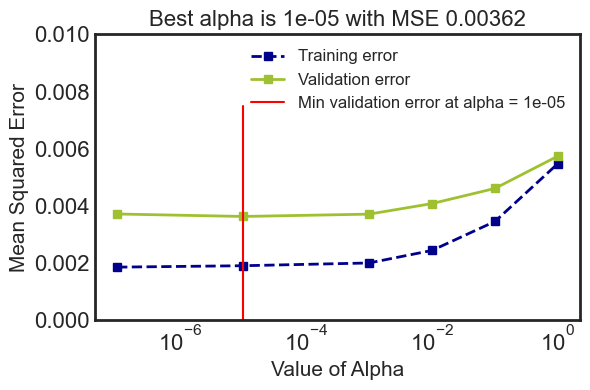

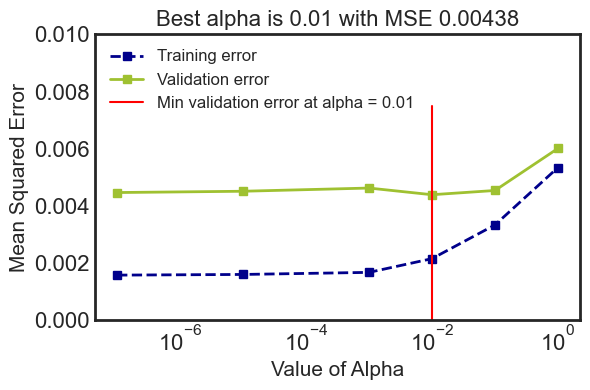

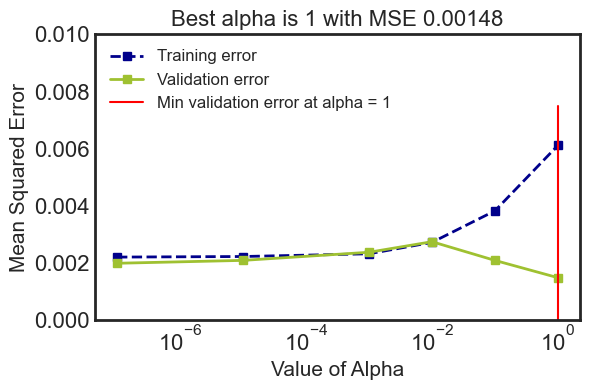

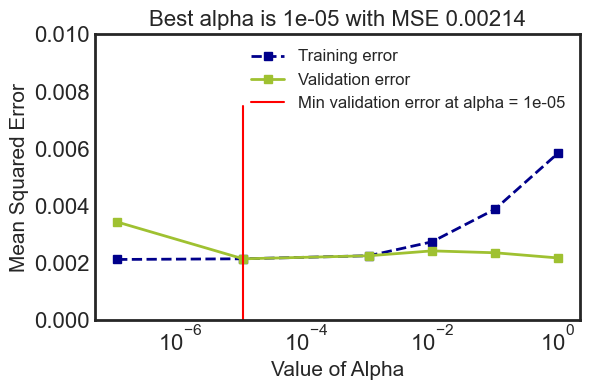

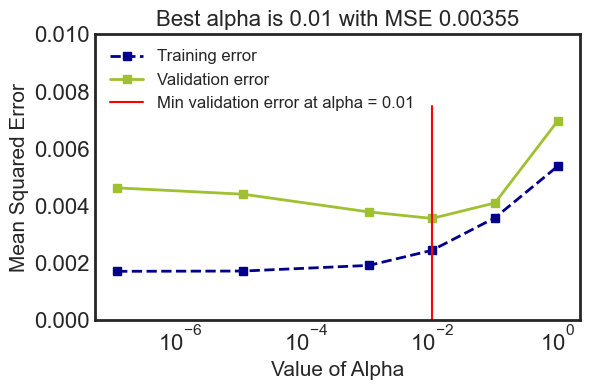

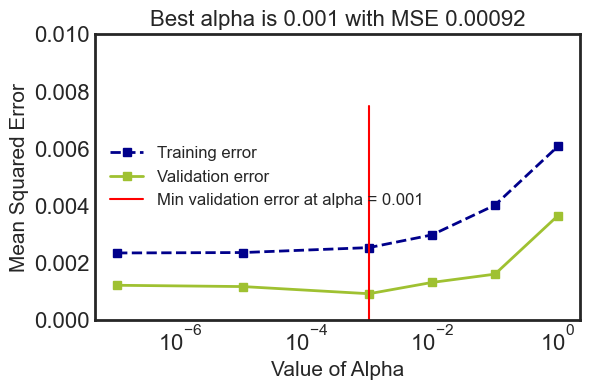

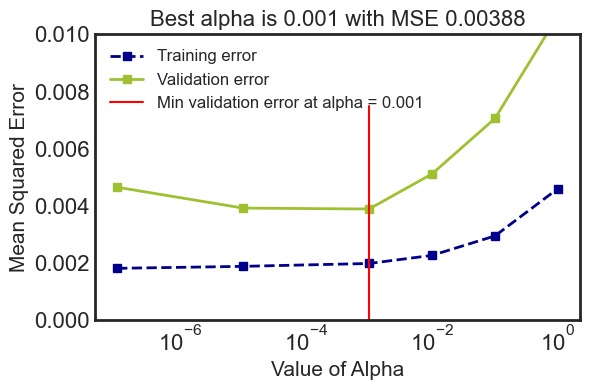

In [187]:
### edTest(test_validation) ###
# Initialise a list to store the best alpha using simple validation for varying random states
best_alpha = []

# Run a loop for different random_states
for rs in ran_state:
    
    # Get the train and validation error by calling the function reg_with_validation
    training_error, validation_error = reg_with_validation(rs)

    # Get the best mse from the validation_error list
    best_mse  = min(validation_error)
    
    # Get the best alpha value based on the best mse
    best_parameter = alphas[validation_error.index(best_mse)]
    
    # Append the best alpha to the list
    best_alpha.append(best_parameter)
    
    # Use the helper code given below to plot the graphs
    fig, ax = plt.subplots(figsize = (6,4))
    
    # Plot the training errors for each alpha value
    ax.plot(alphas,training_error,'s--', label = 'Training error',color = 'Darkblue',linewidth=2)
    
    # Plot the validation errors for each alpha value
    ax.plot(alphas,validation_error,'s-', label = 'Validation error',color ='#9FC131FF',linewidth=2 )

    # Draw a vertical line at the best parameter
    ax.axvline(best_parameter, 0, 0.75, color = 'r', label = f'Min validation error at alpha = {best_parameter}')

    ax.set_xlabel('Value of Alpha',fontsize=15)
    ax.set_ylabel('Mean Squared Error',fontsize=15)
    ax.set_ylim([0,0.010])
    ax.legend(loc = 'best',fontsize=12)
    bm = round(best_mse, 5)
    ax.set_title(f'Best alpha is {best_parameter} with MSE {bm}',fontsize=16)
    ax.set_xscale('log')
    plt.tight_layout()
    plt.show()

In [188]:
# Function to perform regularization with cross validation
def reg_with_cross_validation(rs):
    
    # Sample your data to get different splits using the random state
    df_new = df.sample(frac=1, random_state=rs)
    
    # Assign the values of the 'x' column as the predictor from your sampled dataframe
    x = df_new[['x']].values

    # Assign the values of the 'y' column as the response from your sampled dataframe
    y = df_new['y'].values

    # Create two lists for training and validation error
    training_error, validation_error = [],[]

    # Compute the polynomial features on the entire data
    x_poly = PolynomialFeatures(degree=30).fit_transform(x)

    # Run a loop for all alpha values
    for alpha in alphas:

        # Initialise a Ridge regression model by specifying the alpha value and with fit_intercept=False
        ridge_reg = Ridge(alpha=alpha,fit_intercept=False)
        
        # Perform cross validation on the modified data with neg_mean_squared_error as the scoring parameter and cv=5
        # Remember to get the train_score
        ridge_cv = cross_validate(ridge_reg,x_poly,y,scoring="neg_mean_squared_error",cv=5,return_train_score=True)

        # Compute the training and validation errors got after cross validation
        mse_train = (abs(ridge_cv['train_score'].mean()))
        mse_val = (abs(ridge_cv['test_score'].mean()))
        
        # Append the MSEs to their respective lists 
        training_error.append(mse_train)
        validation_error.append(mse_val)
    
    # Return the train and validation MSE
    return training_error, validation_error


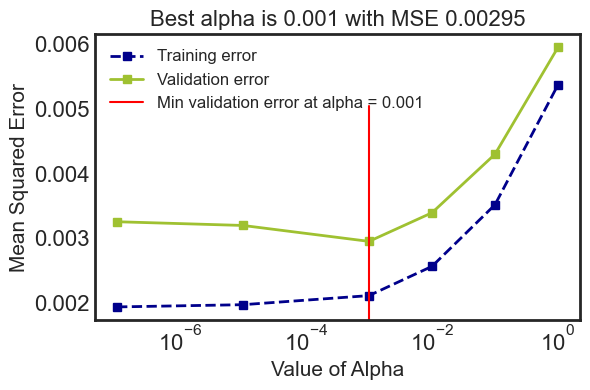

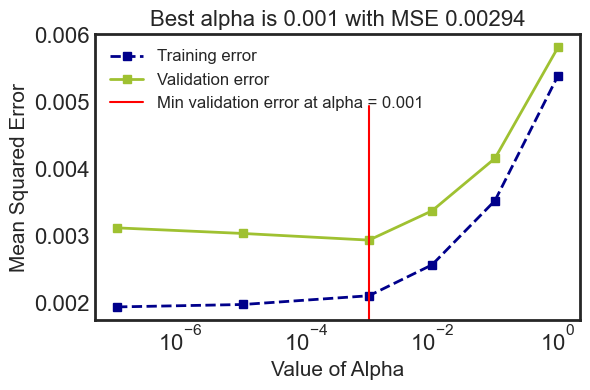

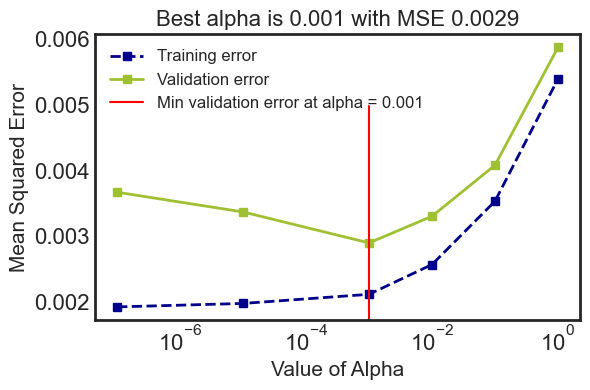

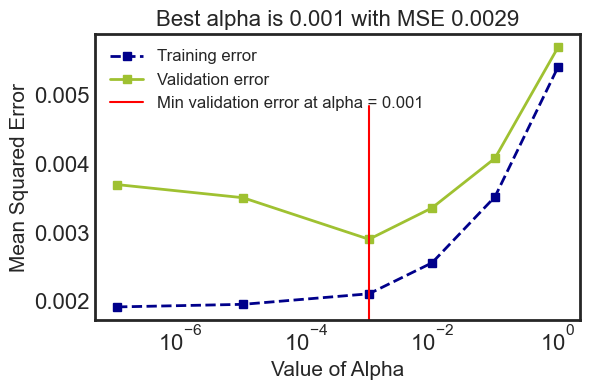

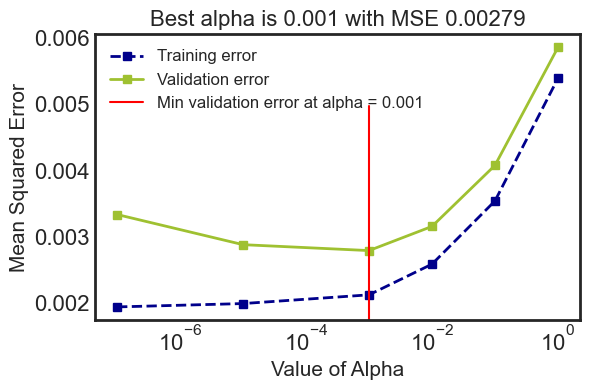

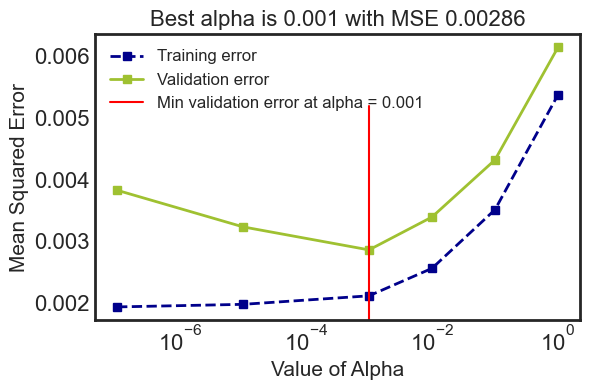

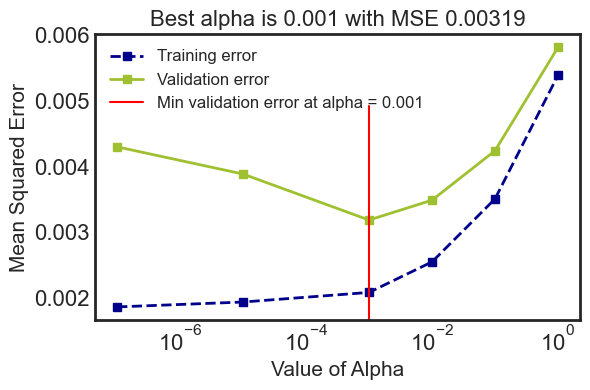

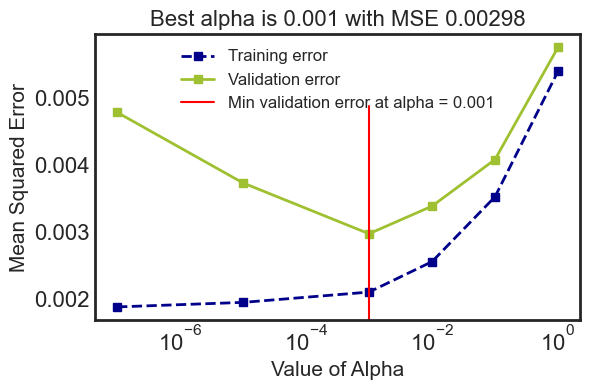

In [189]:
### edTest(test_cross_validation) ###
# Initialise a list to store the best alpha using cross validation for varying random states
best_cv_alpha = []

# Run a loop for different random_states
for rs in ran_state:
    
    # Get the train and validation error by calling the function reg_with_cross_validation
    training_error, validation_error = reg_with_cross_validation(rs)
    
    # Get the best mse from the validation_error list
    best_mse  = min(validation_error)
    
    # Get the best alpha value based on the best mse
    best_parameter = alphas[validation_error.index(best_mse)]
    
    # Append the best alpha to the list
    best_cv_alpha.append(best_parameter)
    
    # Use the helper code given below to plot the graphs
    fig, ax = plt.subplots(figsize = (6,4))
    
    # Plot the training errors for each alpha value
    ax.plot(alphas,training_error,'s--', label = 'Training error',color = 'Darkblue',linewidth=2)
    
    # Plot the validation errors for each alpha value
    ax.plot(alphas,validation_error,'s-', label = 'Validation error',color ='#9FC131FF',linewidth=2 )

    # Draw a vertical line at the best parameter
    ax.axvline(best_parameter, 0, 0.75, color = 'r', label = f'Min validation error at alpha = {best_parameter}')

    ax.set_xlabel('Value of Alpha',fontsize=15)
    ax.set_ylabel('Mean Squared Error',fontsize=15)
    ax.legend(loc = 'best',fontsize=12)
    bm = round(best_mse, 5)
    ax.set_title(f'Best alpha is {best_parameter} with MSE {bm}',fontsize=16)
    ax.set_xscale('log')
    plt.tight_layout()

In [190]:
# Use the helper code below to print your findings
pt = PrettyTable()

pt.field_names = ["Random State", "Best Alpha with Validation", "Best Alpha with Cross-Validation"]

for i in range(6):
    pt.add_row([ran_state[i], best_alpha[i], best_cv_alpha[i]])

print(pt)

+--------------+----------------------------+----------------------------------+
| Random State | Best Alpha with Validation | Best Alpha with Cross-Validation |
+--------------+----------------------------+----------------------------------+
|      0       |            0.01            |              0.001               |
|      10      |           1e-05            |              0.001               |
|      21      |            0.01            |              0.001               |
|      42      |             1              |              0.001               |
|      66      |           1e-05            |              0.001               |
|     109      |            0.01            |              0.001               |
+--------------+----------------------------+----------------------------------+


# Exercise: Hyper-parameter Tuning for Ridge Regression

In [192]:
# Import required libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# These are custom functions made to help you visualise your results
# from helper import plot_functions
# from helper import plot_coefficients

In [193]:
# Open the file 'polynomial50.csv' as a dataframe

df = pd.read_csv('polynomial50.csv')

In [194]:
df.head()

,x,f,y
0,0.000000,1.000000,0.923951
1,0.020408,1.039176,1.028283
2,0.040816,1.075173,1.069739
3,0.061224,1.108144,1.077327
4,0.081633,1.138242,1.105688


In [195]:
df.shape

(50, 3)

In [196]:
# Assign the values of the 'x' column as the predictor

x = df[['x']].values

# Assign the values of the 'y' column as the response

y = df['y'].values

# Also assign the true value of the function (column 'f') to the variable f 

f = df['f'].values

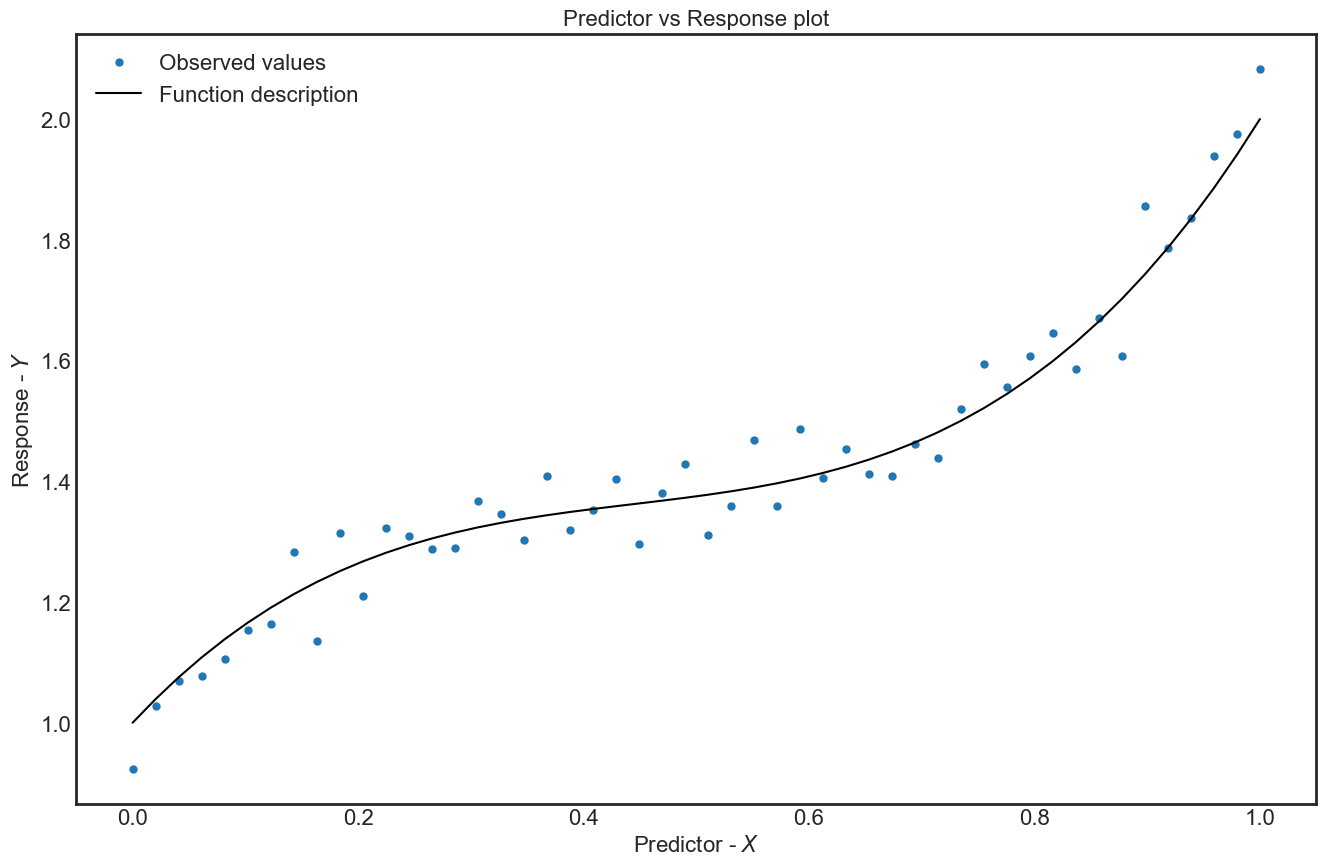

In [197]:
# Visualise the distribution of the x, y values & also the value of the true function f

fig, ax = plt.subplots()

# Plot x vs y values

ax.plot(x,y, '.', label = 'Observed values',markersize=10)

# Plot x vs true function value

ax.plot(x,f, 'k-', label = 'Function description')

# The code below is to annotate your plot

ax.legend(loc = 'best');

ax.set_xlabel('Predictor - $X$',fontsize=16)
ax.set_ylabel('Response - $Y$',fontsize=16)
ax.set_title('Predictor vs Response plot',fontsize=16);


In [198]:
# Split the data into train and validation sets with training size 80% and random_state = 109

x_train, x_val, y_train, y_val = train_test_split(x,y, train_size = 0.8,random_state=109)

In [206]:
### edTest(test_mse) ### 

# fig, rows = plt.subplots(6, 2, figsize=(16, 24))

# Select the degree for polynomial features

degree= 50

# List of hyper-parameter values 

alphas = [0.0, 1e-7,1e-5, 1e-3, 0.1,1]

# Create two lists for training and validation error

training_error, validation_error = [],[]

# Compute the polynomial features train and validation sets

x_poly_train = PolynomialFeatures(degree=degree).fit_transform(x_train)
x_poly_val= PolynomialFeatures(degree=degree).fit_transform(x_val)

for i, alpha in enumerate(alphas):
    l,r=rows[i]
    
    # For each i, fit a ridge regression on training set
    
    ridge_reg = Ridge(fit_intercept=False, alpha=alpha)
    ridge_reg.fit(x_poly_train,y_train)
    
    # Predict on the validation set 
    
    y_train_pred = ridge_reg.predict(x_poly_train)
    y_val_pred = ridge_reg.predict(x_poly_val)
    
    # Compute the training and validation errors
    
    mse_train = mean_squared_error(y_train, y_train_pred) 
    mse_val = mean_squared_error(y_val, y_val_pred)
    
    # Add that value to the list 
    training_error.append(mse_train)
    validation_error.append(mse_val)
    
    # Use helper functions plot_functions & plot_coefficients to visualise the plots
    
    #plot_functions(degree, ridge_reg, l, df, alpha, x_val, y_val, x_train, y_train)
    #plot_coefficients(ridge_reg, r, alpha)

# sns.despine()

In [204]:
### edTest(test_hyper) ###
# Find the best value of hyper parameter, which gives the least error on the validdata

best_parameter = alphas[validation_error.index(min(validation_error))]

print(f'The best hyper parameter value, alpha = {best_parameter}')


The best hyper parameter value, alpha = 0.001


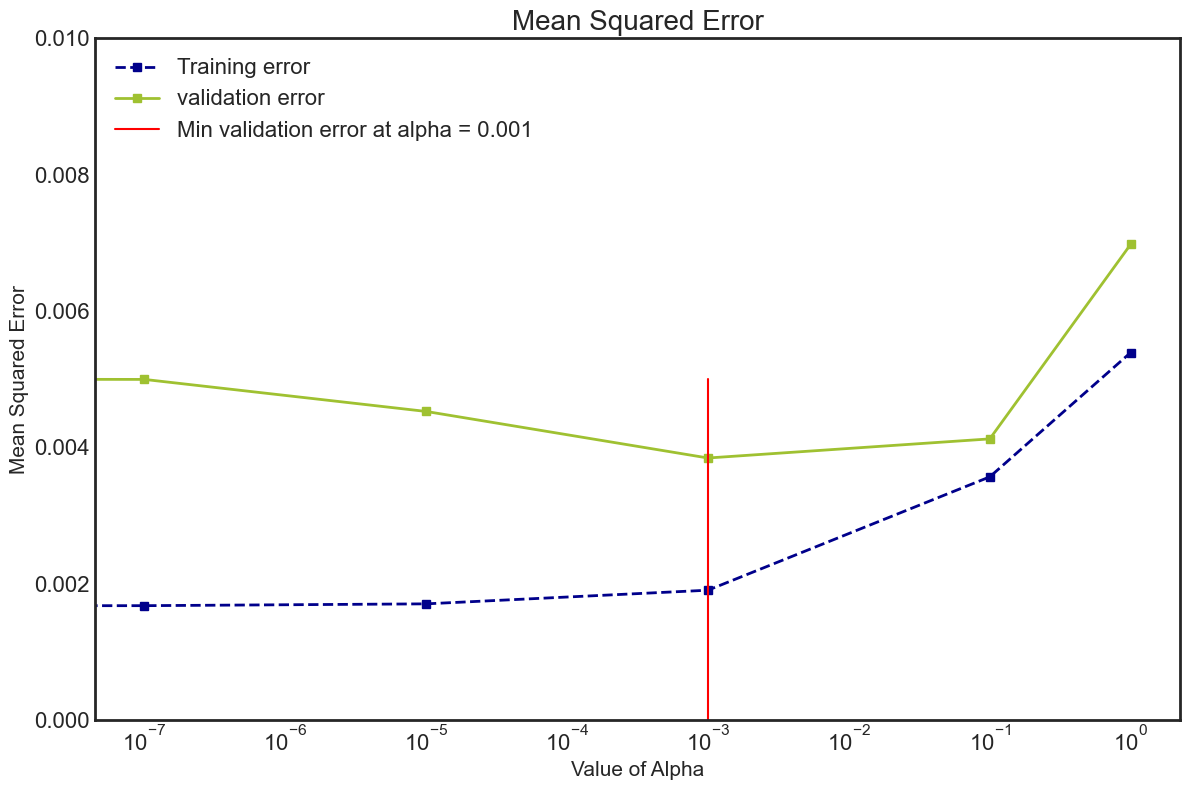

In [207]:
# Now make the MSE polots
# Plot the errors as a function of increasing d value to visualise the training and validation errors

fig, ax = plt.subplots(figsize = (12,8))

# Plot the training errors for each alpha value

ax.plot(alphas,training_error,'s--', label = 'Training error',color = 'Darkblue',linewidth=2)

# Plot the validation errors for each alpha value

ax.plot(alphas,validation_error,'s-', label = 'validation error',color ='#9FC131FF',linewidth=2 )

# Draw a vertical line at the best parameter

ax.axvline(best_parameter, 0, 0.5, color = 'r', label = f'Min validation error at alpha = {best_parameter}')

ax.set_xlabel('Value of Alpha',fontsize=15)
ax.set_ylabel('Mean Squared Error',fontsize=15)
ax.set_ylim([0,0.010])
ax.legend(loc = 'upper left',fontsize=16)
ax.set_title('Mean Squared Error',fontsize=20)
ax.set_xscale('log')
plt.tight_layout()

# Exercise: Simple Lasso and Ridge Regularization (External resource) 

In [208]:
# Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


In [209]:
# Read the file "Boston_housing.csv" as a Pandas dataframe
df = pd.read_csv("Boston_housing.csv")


In [210]:
df.head()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [211]:
df.shape

(506, 12)

In [212]:
df.columns

Index(['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio',
       'black', 'lstat', 'medv'],
      dtype='object')

In [216]:
# Select a subdataframe of predictors mentioned above
X = df[['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio',
       'black', 'lstat']]

# Normalize the values of the dataframe 
X_norm = preprocessing.normalize(X, axis=0)

# Select medv as the response variable
y = df['medv']


In [218]:
### edTest(test_random) ###
# Split the data into train and validation sets with 70% train data and
# random_state as 31
X_train, X_val, y_train, y_val = train_test_split(X_norm,y,train_size=0.7,random_state=31)


In [219]:
# Initialize a Linear Regression model
lreg = LinearRegression()

# Fit the linear model on the train data
lreg.fit(X_train,y_train)

# Predict on the validation data
y_val_pred = lreg.predict(X_val)


In [220]:
# Use the mean_squared_error function to compute the validation mse
mse = mean_squared_error(y_val,y_val_pred)

# Print the MSE value
print ("Multi-linear regression validation MSE is", mse)


Multi-linear regression validation MSE is 21.581146124032497


In [221]:
# Helper code to create a dictionary of the coefficients 
# along with the predictors as keys
lreg_coef = dict(zip(X.columns, np.transpose(lreg.coef_)))

# Linear regression coefficients for plotting
lreg_x = list(lreg_coef.keys())
lreg_y = list(lreg_coef.values())


In [224]:
# Create a Lasso Regression model with alpha as 0.008
lasso_reg = Lasso(alpha=0.008)

# Fit the model on the train data
lasso_reg.fit(X_train,y_train)

# Predict on the validation data using the trained model
y_val_pred =lasso_reg.predict(X_val)


In [225]:
# Calculate the validation MSE
mse_lasso = mean_squared_error(y_val,y_val_pred)

# Print the validation MSE
print ("Lasso validation MSE is", mse_lasso)


Lasso validation MSE is 26.059895644427694


In [226]:
# Hhelper code to make a dictionary of the predictors 
# along with the coefficients associated with them
lasso_coef = dict(zip(X.columns, np.transpose(lasso_reg.coef_))) 

# Get the Lasso regularisation coefficients for plotting
lasso_x = list(lasso_coef.keys())
lasso_y = list(lasso_coef.values())


In [227]:
# Create a Ridge Regression model with alpha as 0.008
ridgeReg = Ridge(alpha=0.008)

# Fit the model on the train data
ridgeReg.fit(X_train,y_train)

# Predict the trained model on the validation data
y_val_pred = ridgeReg.predict(X_val)


In [228]:
### edTest(test_mse) ###

# Calculate the validation MSE
mse_ridge = mean_squared_error(y_val,y_val_pred)

# Print he valdiation MSE
print ("Ridge validation MSE is", mse_ridge)


Ridge validation MSE is 23.016227017838567


In [229]:
# Helper code to make a dictionary of the predictors 
# along with the coefficients associated with them 
ridge_coef = dict(zip(X.columns, np.transpose(ridgeReg.coef_))) 

# Ridge regularisation coefficients for plotting
ridge_x = list(ridge_coef.keys())
ridge_y = list(ridge_coef.values())


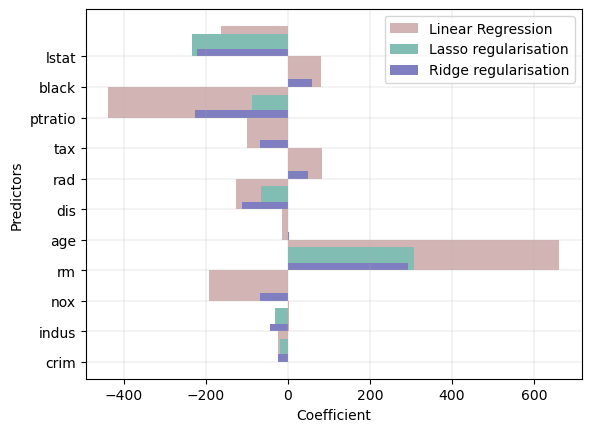

In [230]:
# Helper code below to visualise your results

plt.rcdefaults()

plt.barh(lreg_x,lreg_y,1.0, align='edge',color="#D3B4B4", label="Linear Regression")
plt.barh(lasso_x,lasso_y,0.75 ,align='edge',color="#81BDB2",label = "Lasso regularisation")
plt.barh(ridge_x,ridge_y,0.25 ,align='edge',color="#7E7EC0", label="Ridge regularisation")
plt.grid(linewidth=0.2)
plt.xlabel("Coefficient")
plt.ylabel("Predictors")
plt.legend(loc='best')
plt.show()
